In [4]:
import pandas as pd

%matplotlib inline

from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')


data=pd.read_csv('C:\\Users\\nmanogna\\Documents\\python\\Data_Train.csv')

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
data.describe()


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [99]:
kt_data_1=data[(data["Source"]=="Kolkata") &  (data["Destination"]=="Banglore")]["Total_Stops"].value_counts()

bg_data_1=data[(data["Source"]=="Banglore") &  (data["Destination"]=="New Delhi")]["Total_Stops"].value_counts()


print(bg_data_1.head())

kt_data_1.head()

1 stop      562
non-stop    287
2 stops      75
3 stops       7
4 stops       1
Name: Total_Stops, dtype: int64


1 stop      1834
non-stop     724
2 stops      302
3 stops       11
Name: Total_Stops, dtype: int64

In [161]:
df=pd.DataFrame([kt_data_1,bg_data_1])

df.index=['KOL-BNG','BNG-NewDelhi']

df.head()

,1 stop,non-stop,2 stops,3 stops,4 stops
KOL-BNG,1834.0,724.0,302.0,11.0,NaN
BNG-NewDelhi,562.0,287.0,75.0,7.0,1.0


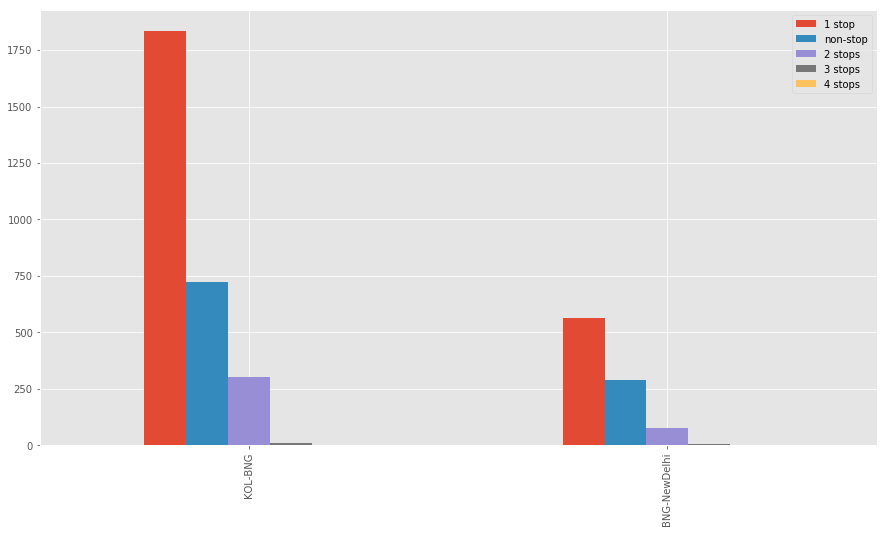

In [160]:
df.plot(kind='bar',stacked=False, figsize=(15,8))

                    1 stop       2 stops       3 stops     non-stop  4 stops
KOL-BNG       10477.414395  12036.125828  13151.272727  4556.055249      NaN
BNG-NEWDELHI  14016.540925  13322.800000  12761.000000  7399.975610  17686.0


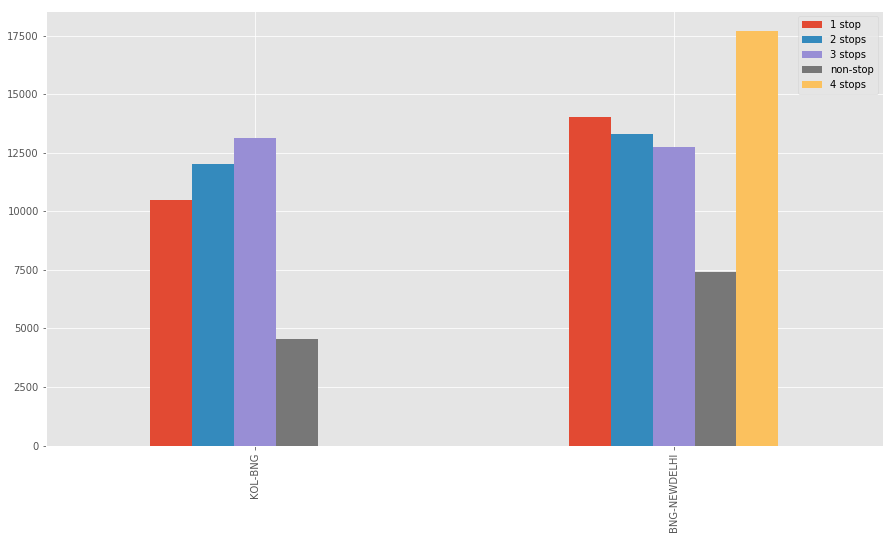

In [3]:
kt_data_2=data[(data["Source"]=="Kolkata") &  (data["Destination"]=="Banglore")].groupby("Total_Stops").mean()["Price"]

bg_data_2=data[(data["Source"]=="Banglore") &  (data["Destination"]=="New Delhi")].groupby("Total_Stops").mean()["Price"]




#df=pd.concat([kt_data_2,bg_data_2])

df_1=pd.DataFrame([kt_data_2,bg_data_2])

df_1.index=['KOL-BNG','BNG-NEWDELHI']

print(df_1.head())


#print(df_1.columns)


df_1.plot(kind='bar',stacked=False, figsize=(15,8))



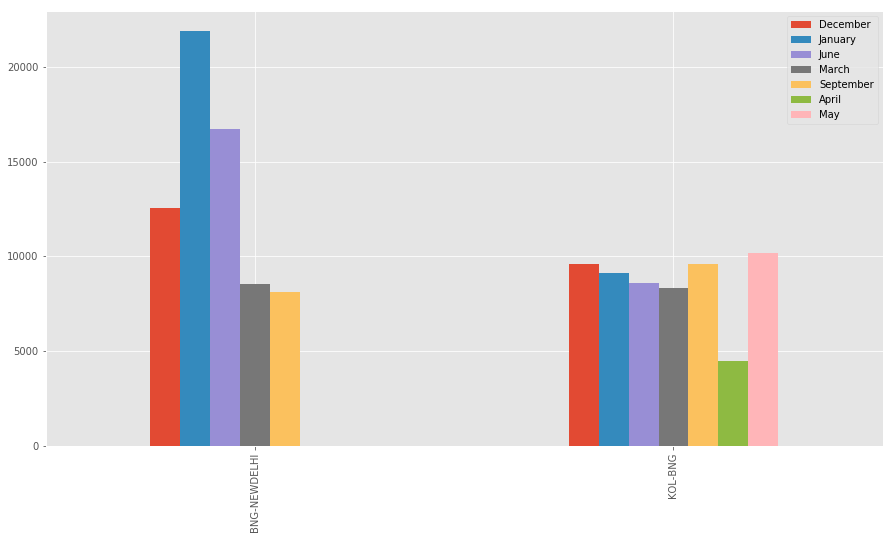

In [29]:
import calendar

data["month"]=pd.DatetimeIndex(data["Date_of_Journey"]).month_name()


bg_data3=data[(data["Source"]=="Banglore") & (data["Destination"]=="New Delhi")].groupby("month").mean()["Price"]

kt_data3=data[(data["Source"]=="Kolkata") & (data["Destination"]=="Banglore")].groupby("month").mean()["Price"]

df_2=pd.DataFrame([bg_data3,kt_data3])

df_2.index=["BNG-NEWDELHI","KOL-BNG"]


df_2.plot(kind='bar',stacked=False, figsize=(15,8))